In [7]:
import numpy as np
import matplotlib.pyplot as plt
from spafe.features import mfcc
import librosa.util as util
import librosa
from spafe.utils import vis

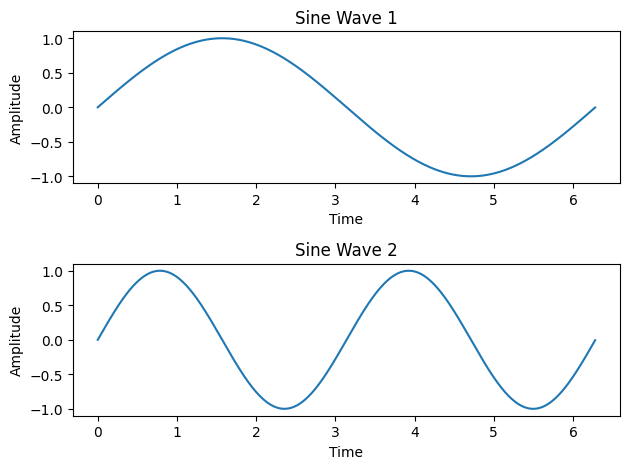

In [3]:
# Generate time values from 0 to 2*pi with 0.01 spacing
time = np.arange(0, 2*np.pi, 0.01)

# Define two different sine waves with different frequencies
frequency1 = 1  # Adjust the frequency as needed
frequency2 = 2  # Adjust the frequency as needed
amplitude = 1    # Amplitude of the sine wave

# Calculate the sine values for both waves
wave1 = amplitude * np.sin(frequency1 * time)
wave2 = amplitude * np.sin(frequency2 * time)

# Plot the first sine wave
plt.subplot(2, 1, 1)  # Subplot 1
plt.plot(time, wave1)
plt.title('Sine Wave 1')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the second sine wave
plt.subplot(2, 1, 2)  # Subplot 2
plt.plot(time, wave2)
plt.title('Sine Wave 2')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
nfft = 256
def get_feature(sample, nfft):
    return np.log(np.abs(librosa.stft(sample, n_fft=nfft)).T)

def vis_helper(feature, title="",x="Frame", y="Feature"):
    vis.show_features(feature, title, y, x, figsize=(6, 3), cmap="viridis")

In [9]:
# get features
features_a = get_feature(wave1, nfft=nfft)
features_b = get_feature(wave2, nfft=nfft)


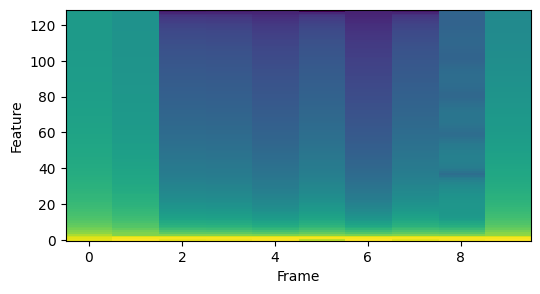

In [11]:
vis_helper(features_b)